In [3]:
import pandas as pd

benin = pd.read_csv('../cleaned_data/cleaned_benin_data.csv')
sierra_leone = pd.read_csv('../cleaned_data/cleaned_sierraleone_data.csv')
togo = pd.read_csv('../cleaned_data/cleaned_togo_data.csv')


In [4]:
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra_leone, togo], ignore_index=True)


C:\Users\arsem\AppData\Local\Temp\ipykernel_14916\2544879506.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


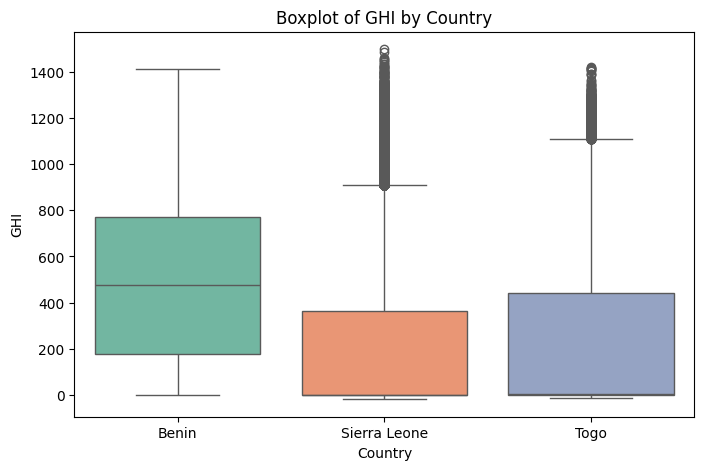

C:\Users\arsem\AppData\Local\Temp\ipykernel_14916\2544879506.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


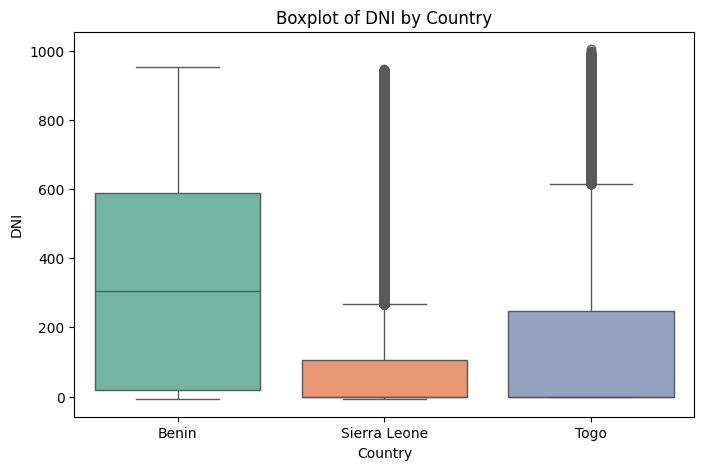

C:\Users\arsem\AppData\Local\Temp\ipykernel_14916\2544879506.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


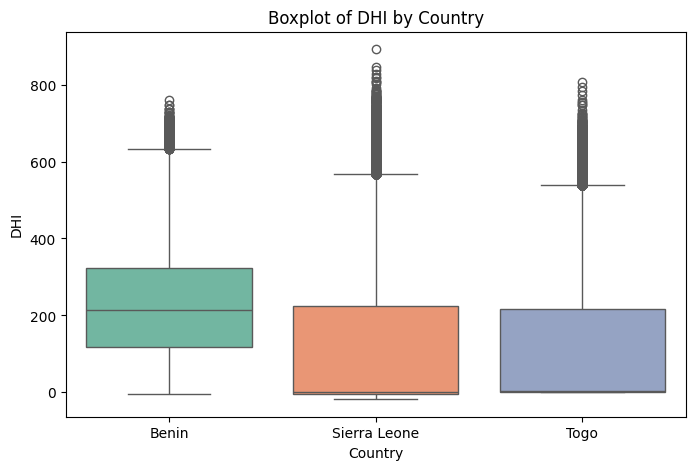

In [3]:
# noxplots for GHI, DNI DHI 

import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df, palette='Set2')
    plt.title(f'Boxplot of {metric} by Country')
    plt.show()


In [4]:
# Summary Table: mean, median, std of GHI, DNI, DHI by Country
summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         476.76  474.2  320.57  329.90  305.1  284.96  230.52  213.2   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         150.62  
Sierra Leone  158.95  
Togo          156.52

In [5]:
# Statistical Testing: One-way ANOVA or Kruskal–Wallis on GHI
from scipy.stats import f_oneway, kruskal

ghi_benin = benin['GHI'].dropna()
ghi_sierra = sierra_leone['GHI'].dropna()
ghi_togo = togo['GHI'].dropna()

# Run ANOVA
anova_res = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

# If non-normal, use Kruskal-Wallis
kruskal_res = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print(f"ANOVA p-value: {anova_res.pvalue:.4f}")
print(f"Kruskal-Wallis p-value: {kruskal_res.pvalue:.4f}")


ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


Key Observations

Benin shows the highest mean and median values for GHI, DNI, and DHI, indicating it likely has the greatest overall solar potential among the three countries.

Sierra Leone has the lowest median GHI (close to zero) and DNI, and also the lowest mean values for these metrics, suggesting significantly lower solar radiation compared to Benin and Togo.

Togo displays mean and median solar values that are higher than Sierra Leone but lower than Benin, with the greatest variability (highest std) in GHI among the three countries, indicating more fluctuation in solar irradiance.



C:\Users\arsem\AppData\Local\Temp\ipykernel_14916\1369299146.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


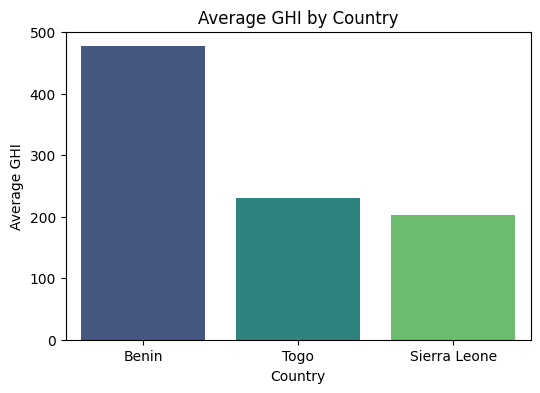

In [6]:
# Bar Chart Ranking Countries by Average GHI
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.show()


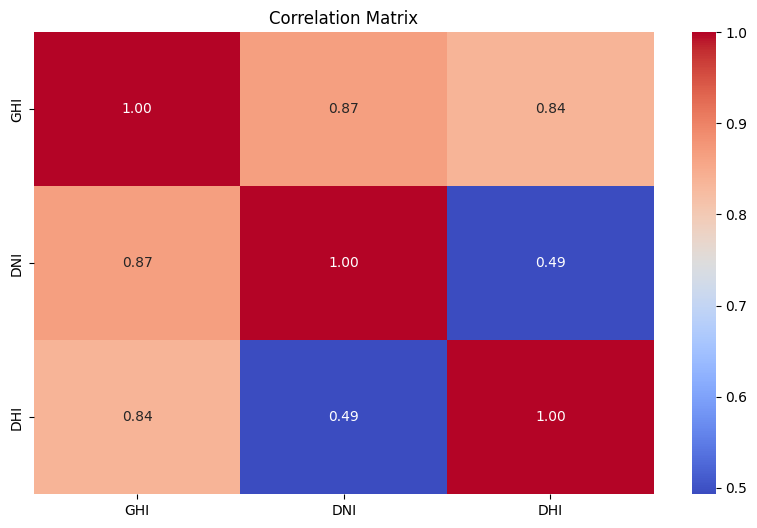

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
correlation_matrix = combined_data[['GHI', 'DNI', 'DHI']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

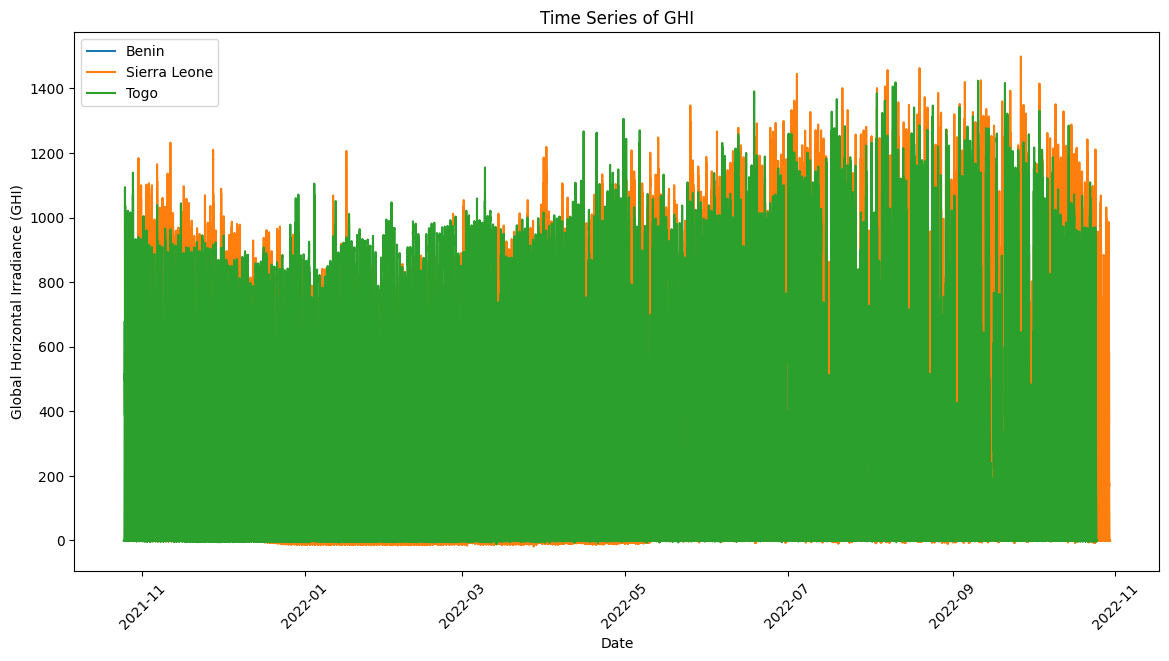

In [7]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
plt.figure(figsize=(14, 7))
for country in ['Benin', 'Sierra Leone', 'Togo']:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Timestamp'], country_data['GHI'], label=country)

plt.xlabel('Date')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Time Series of GHI')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [11]:
summary_stats = df.groupby('Country')[['GHI', 'DNI', 'DHI']].describe()
print(summary_stats)

                   GHI                                                     \
                 count        mean         std   min    25%    50%    75%   
Country                                                                     
Benin         266746.0  476.758966  320.573494   0.0  176.9  474.2  771.9   
Sierra Leone  525600.0  201.957515  298.495150 -19.5   -2.8    0.3  362.4   
Togo          525600.0  230.555040  322.532347 -12.7   -2.2    2.1  442.4   

                           DNI              ...                      DHI  \
                 max     count        mean  ...    75%     max     count   
Country                                     ...                            
Benin         1413.0  266746.0  329.899390  ...  587.5   952.3  266746.0   
Sierra Leone  1499.0  525600.0  116.376337  ...  107.0   946.0  525600.0   
Togo          1424.0  525600.0  151.258469  ...  246.4  1004.5  525600.0   

                                                                        
       